In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [36]:
data = pd.read_csv(r'D:\Machine Learning\French_Bakery_Daily_Sales\Dataset\Bakery sales.csv')

In [37]:
data.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   article        234005 non-null  object 
 5   Quantity       234005 non-null  float64
 6   unit_price     234005 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.5+ MB


In [39]:
data.describe()

,Unnamed: 0,ticket_number,Quantity
count,234005.000000,234005.000000,234005.000000
mean,255205.035854,219201.258738,1.538377
std,147501.625992,40053.223896,1.289603
min,0.000000,150040.000000,-200.000000
25%,127979.000000,184754.000000,1.000000
50%,254573.000000,218807.000000,1.000000
75%,382911.000000,253927.000000,2.000000
max,511395.000000,288913.000000,200.000000


In [40]:
data.isnull().sum()

Unnamed: 0       0
date             0
time             0
ticket_number    0
article          0
Quantity         0
unit_price       0
dtype: int64

In [41]:
# Identify categorical and numerical features
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = data.select_dtypes(include=['number']).columns.tolist()

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)

Categorical Features: ['date', 'time', 'article', 'unit_price']
Numerical Features: ['Unnamed: 0', 'ticket_number', 'Quantity']


In [42]:
# Display the first 5 rows
df_head = data.head()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 2))  # Adjust size as needed
ax.axis('off')  # Hide axes

# Create table
table = ax.table(cellText=df_head.values, colLabels=df_head.columns, loc='center', cellLoc='center')

# Save as image
plt.savefig('data_head.png', bbox_inches='tight', dpi=200)
plt.close()

In [43]:
# Display descriptive statistics
df_desc = data.describe()

fig, ax = plt.subplots(figsize=(10, 3))  # Adjust size as needed
ax.axis('off')

table = ax.table(cellText=df_desc.values, colLabels=df_desc.columns, rowLabels=df_desc.index, loc='center', cellLoc='center')

plt.savefig('data_describe.png', bbox_inches='tight', dpi=200)
plt.close()

In [44]:
# Remove euro sign and replace comma with dot, then convert to float
data['unit_price_clean'] = data['unit_price'].str.replace('€', '').str.replace(',', '.').str.strip()
data['unit_price_clean'] = data['unit_price_clean'].astype(float)

# Create the price feature
data['price'] = data['Quantity'] * data['unit_price_clean']

# Optional: Drop the intermediate column if you don't need it
# data.drop('unit_price_clean', axis=1, inplace=True)

# Display the first few rows to check
print(data[['Quantity', 'unit_price', 'unit_price_clean', 'price']].head())

   Quantity unit_price  unit_price_clean  price
0       1.0     0,90 €              0.90   0.90
1       3.0     1,20 €              1.20   3.60
2       2.0     1,20 €              1.20   2.40
3       1.0     1,15 €              1.15   1.15
4       5.0     1,20 €              1.20   6.00


In [45]:
data.head()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €",0.90,0.90
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",1.20,3.60
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",1.20,2.40
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €",1.15,1.15
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",1.20,6.00


In [46]:
# Drop the 'Unnamed: 0' column
data = data.drop('Unnamed: 0', axis=1)

# Optional: Check the columns to confirm
print(data.columns)

Index(['date', 'time', 'ticket_number', 'article', 'Quantity', 'unit_price',
       'unit_price_clean', 'price'],
      dtype='object')


In [47]:
data.head()

,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €",0.90,0.90
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",1.20,3.60
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",1.20,2.40
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €",1.15,1.15
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",1.20,6.00


In [48]:
# Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Create a 'day' column (day of the month)
data['day'] = data['date'].dt.day

# Display the first few rows to check
print(data[['date', 'day']].head())

        date  day
0 2021-01-02    2
1 2021-01-02    2
2 2021-01-02    2
3 2021-01-02    2
4 2021-01-02    2


In [49]:
data = data.rename(columns={'day': 'day_of_the_month'})

# Optional: Check the columns to confirm
print(data.columns)

Index(['date', 'time', 'ticket_number', 'article', 'Quantity', 'unit_price',
       'unit_price_clean', 'price', 'day_of_the_month'],
      dtype='object')


In [50]:
data.head()

,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,price,day_of_the_month
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €",0.90,0.90,2
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",1.20,3.60,2
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",1.20,2.40,2
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €",1.15,1.15,2
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",1.20,6.00,2


In [51]:
# Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Create a new column 'day' with the day name
data['day'] = data['date'].dt.day_name()

# Display the first few rows to check
print(data[['date', 'day']].head())

        date       day
0 2021-01-02  Saturday
1 2021-01-02  Saturday
2 2021-01-02  Saturday
3 2021-01-02  Saturday
4 2021-01-02  Saturday


In [52]:
data.head()

,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,price,day_of_the_month,day
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €",0.90,0.90,2,Saturday
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",1.20,3.60,2,Saturday
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",1.20,2.40,2,Saturday
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €",1.15,1.15,2,Saturday
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",1.20,6.00,2,Saturday


In [53]:
data.tail()

,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,price,day_of_the_month,day
234000,2022-09-30,18:52,288911.0,COUPE,1.0,"0,15 €",0.15,0.15,30,Friday
234001,2022-09-30,18:52,288911.0,BOULE 200G,1.0,"1,20 €",1.20,1.20,30,Friday
234002,2022-09-30,18:52,288911.0,COUPE,2.0,"0,15 €",0.15,0.30,30,Friday
234003,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,"1,30 €",1.30,1.30,30,Friday
234004,2022-09-30,18:56,288913.0,TRADITIONAL BAGUETTE,1.0,"1,30 €",1.30,1.30,30,Friday


In [54]:
# Count total unique values in the 'article' column
unique_articles = data['article'].nunique()
print("Total unique articles:", unique_articles)

Total unique articles: 149


In [55]:
print(data['article'].unique())

['BAGUETTE' 'PAIN AU CHOCOLAT' 'PAIN' 'TRADITIONAL BAGUETTE' 'CROISSANT'
 'BANETTE' 'BANETTINE' 'SPECIAL BREAD' 'COUPE' 'SAND JB EMMENTAL'
 'KOUIGN AMANN' 'BOULE 200G' 'BOULE 400G' 'GAL FRANGIPANE 6P' 'CAMPAGNE'
 'MOISSON' 'CAFE OU EAU' 'BRIOCHE' 'CEREAL BAGUETTE' 'SEIGLE' 'COMPLET'
 'DIVERS PATISSERIE' 'GAL FRANGIPANE 4P' 'COOKIE' 'FICELLE'
 'PAIN AUX RAISINS' 'GAL POMME 6P' 'GAL POMME 4P' 'FINANCIER X5'
 'VIK BREAD' 'DIVERS VIENNOISERIE' 'GACHE' 'SANDWICH COMPLET'
 'PAIN BANETTE' 'GRAND FAR BRETON' 'QUIM BREAD' 'SPECIAL BREAD KG'
 'GD KOUIGN AMANN' 'BOULE POLKA' 'DEMI BAGUETTE' 'CHAUSSON AUX POMMES'
 'BAGUETTE GRAINE' 'DIVERS CONFISERIE' 'SUCETTE' 'DIVERS BOULANGERIE'
 'BOISSON 33CL' 'PATES' 'FORMULE SANDWICH' 'DIVERS SANDWICHS'
 'CROISSANT AMANDES' 'PAIN CHOCO AMANDES' 'SACHET VIENNOISERIE' 'NANTAIS'
 'CHOCOLAT' 'PAIN S/SEL' 'FONDANT CHOCOLAT' 'GAL POIRE CHOCO 6P'
 'GAL POIRE CHOCO 4P' 'GALETTE 8 PERS' 'SAND JB' 'SACHET DE CROUTON'
 'GRANDE SUCETTE' 'DEMI PAIN' 'TARTELETTE' 'FLAN' '

In [56]:
# Group by 'article' and sum the 'Quantity' to get total sold for each product
product_sales = data.groupby('article')['Quantity'].sum().sort_values(ascending=False)

# Display the result
print(product_sales)

article
TRADITIONAL BAGUETTE      117463.0
CROISSANT                  29654.0
PAIN AU CHOCOLAT           25236.0
COUPE                      23505.0
BANETTE                    22732.0
                            ...   
PLATPREPARE6,00                1.0
SACHET DE VIENNOISERIE         1.0
REDUCTION SUCREES 24           1.0
TROIS CHOCOLAT                 1.0
PLAT 6.50E                     0.0
Name: Quantity, Length: 149, dtype: float64


In [57]:
data.shape

(234005, 10)

In [58]:
# First, ensure 'time' is in datetime format (only the time part)
data['time'] = pd.to_datetime(data['time'], format='%H:%M').dt.time

# Define a function to map time to period
def get_time_period(t):
    hour = t.hour
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 14:
        return 'noon'
    elif 14 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

# Apply the function to create the new column
data['time_period'] = data['time'].apply(get_time_period)

# Display the first few rows to check
print(data[['time', 'time_period']].head())

       time time_period
0  08:38:00     morning
1  08:38:00     morning
2  09:14:00     morning
3  09:14:00     morning
4  09:25:00     morning


In [59]:
data.head()

,date,time,ticket_number,article,Quantity,unit_price,unit_price_clean,price,day_of_the_month,day,time_period
0,2021-01-02,08:38:00,150040.0,BAGUETTE,1.0,"0,90 €",0.90,0.90,2,Saturday,morning
1,2021-01-02,08:38:00,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €",1.20,3.60,2,Saturday,morning
2,2021-01-02,09:14:00,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €",1.20,2.40,2,Saturday,morning
3,2021-01-02,09:14:00,150041.0,PAIN,1.0,"1,15 €",1.15,1.15,2,Saturday,morning
4,2021-01-02,09:25:00,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €",1.20,6.00,2,Saturday,morning


In [60]:
# Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Create a new column 'month' with the month name
data['month'] = data['date'].dt.month_name()

# Display the first few rows to check
print(data[['date', 'month']].head())

        date    month
0 2021-01-02  January
1 2021-01-02  January
2 2021-01-02  January
3 2021-01-02  January
4 2021-01-02  January


In [61]:
data.shape

(234005, 12)

## Visualization

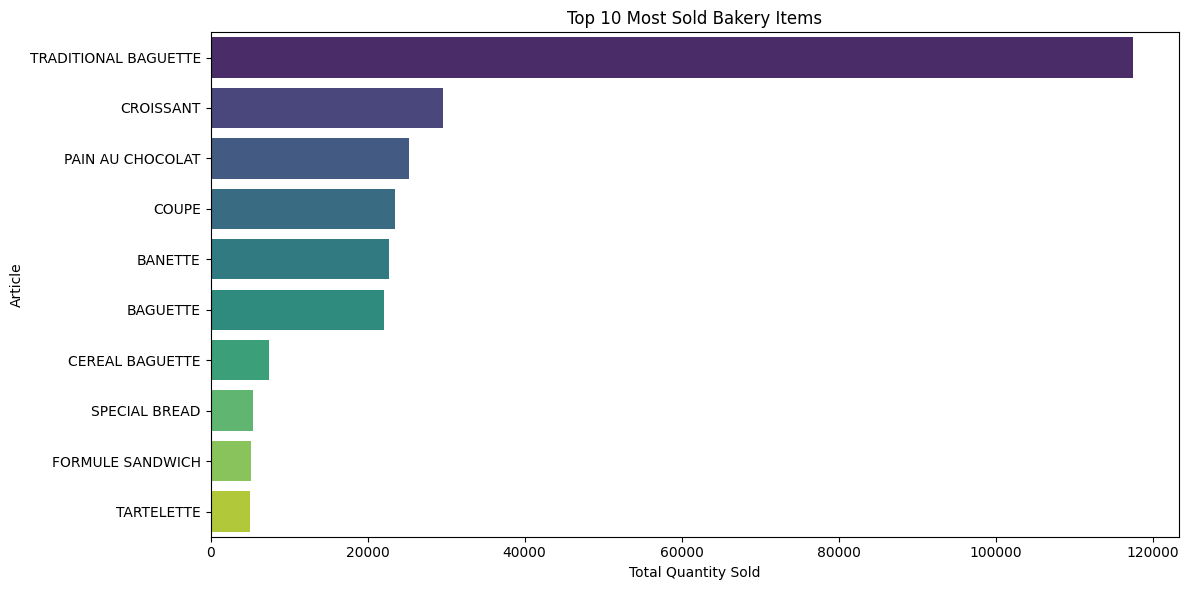

In [62]:
# Group by 'article' and sum the 'Quantity'
product_sales = data.groupby('article')['Quantity'].sum().sort_values(ascending=False)

# Select the top 10 most sold items
top_n = 10
top_products = product_sales.head(top_n).reset_index()

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='Quantity', y='article', palette='viridis')
plt.title(f'Top {top_n} Most Sold Bakery Items')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Article')
plt.tight_layout()
plt.show()

time_period
morning      254981.0
noon          61009.0
evening       31206.0
afternoon     12792.0
Name: Quantity, dtype: float64


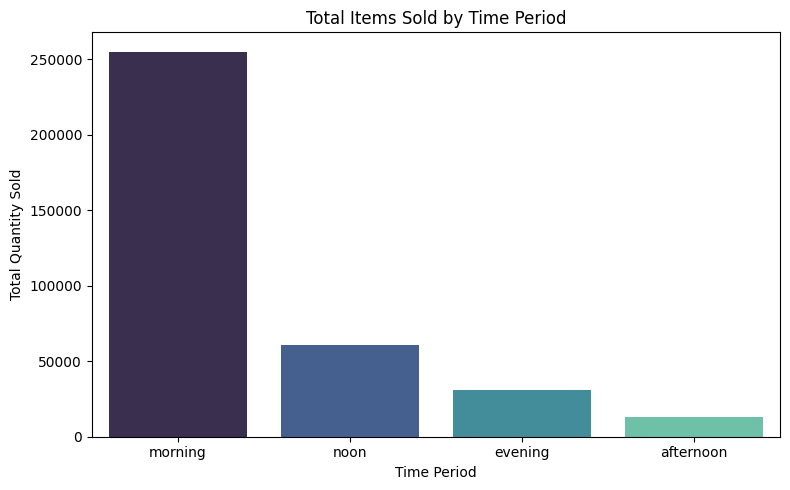

In [63]:
# Group by 'time_period' and sum the 'Quantity'
time_period_sales = data.groupby('time_period')['Quantity'].sum().sort_values(ascending=False)

# Display the result
print(time_period_sales)

# Plot using seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=time_period_sales.index, y=time_period_sales.values, palette='mako')
plt.title('Total Items Sold by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()

day
Sunday       83413.0
Saturday     61702.0
Friday       48115.0
Monday       47715.0
Thursday     44924.0
Tuesday      42491.0
Wednesday    31628.0
Name: Quantity, dtype: float64


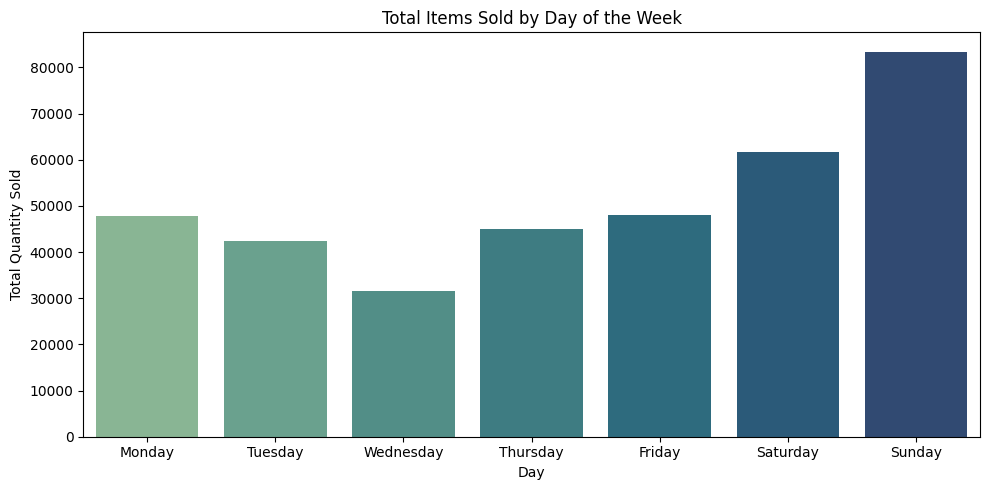

In [64]:
# Group by 'day' and sum the 'Quantity'
day_sales = data.groupby('day')['Quantity'].sum().sort_values(ascending=False)

# Display the result
print(day_sales)

# To ensure days are in calendar order, you can use:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = day_sales.reindex(days_order)

# Plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=day_sales.index, y=day_sales.values, palette='crest')
plt.title('Total Items Sold by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()

month
August       66873.0
July         57529.0
May          37112.0
June         32028.0
April        31479.0
September    28709.0
March        25583.0
February     23365.0
January      18428.0
October      14971.0
December     12138.0
November     11773.0
Name: Quantity, dtype: float64


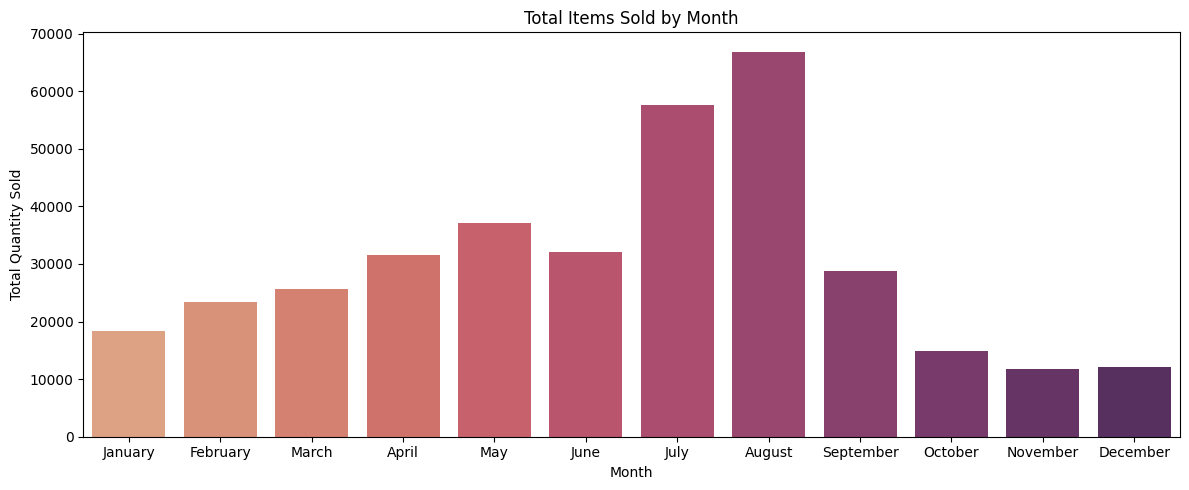

In [65]:
# Ensure 'month' column is in the correct order
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
data['month'] = pd.Categorical(data['month'], categories=months_order, ordered=True)

# Group by 'month' and sum the 'Quantity'
month_sales = data.groupby('month')['Quantity'].sum().sort_values(ascending=False)

# Display the result
print(month_sales)

# Plot using seaborn
plt.figure(figsize=(12, 5))
sns.barplot(x=month_sales.index, y=month_sales.values, palette='flare')
plt.title('Total Items Sold by Month')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.tight_layout()
plt.show()

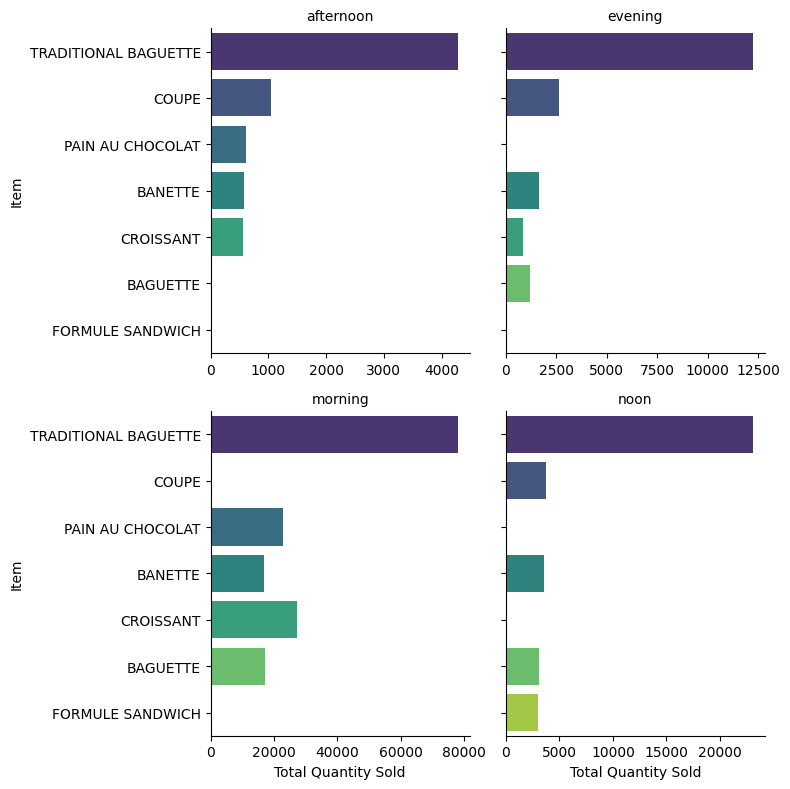


Top 5 items in afternoon:
                  article  Quantity
108  TRADITIONAL BAGUETTE    4274.0
25                  COUPE    1045.0
72       PAIN AU CHOCOLAT     617.0
4                 BANETTE     572.0
26              CROISSANT     565.0

Top 5 items in evening:
                  article  Quantity
230  TRADITIONAL BAGUETTE   12224.0
142                 COUPE    2619.0
120               BANETTE    1639.0
117              BAGUETTE    1187.0
143             CROISSANT     878.0

Top 5 items in morning:
                  article  Quantity
370  TRADITIONAL BAGUETTE   77918.0
268             CROISSANT   27195.0
319      PAIN AU CHOCOLAT   22786.0
241              BAGUETTE   17225.0
244               BANETTE   16971.0

Top 5 items in noon:
                  article  Quantity
501  TRADITIONAL BAGUETTE   23047.0
405                 COUPE    3786.0
384               BANETTE    3550.0
381              BAGUETTE    3138.0
429      FORMULE SANDWICH    3041.0


In [66]:
# Group by time_period and article, sum the quantities
grouped = (
    data.groupby(['time_period', 'article'])['Quantity']
    .sum()
    .reset_index()
)

# For each time period, get the top 5 items
top5_per_period = (
    grouped.sort_values(['time_period', 'Quantity'], ascending=[True, False])
    .groupby('time_period')
    .head(5)
)

# Plot
g = sns.catplot(
    data=top5_per_period,
    x='Quantity',
    y='article',
    col='time_period',
    kind='bar',
    col_wrap=2,
    height=4,
    sharex=False,
    palette='viridis'
)
g.set_titles("{col_name}")
g.set_axis_labels("Total Quantity Sold", "Item")
plt.tight_layout()
plt.show()

# Print the top 5 items for each period
for period in top5_per_period['time_period'].unique():
    print(f"\nTop 5 items in {period}:")
    print(top5_per_period[top5_per_period['time_period'] == period][['article', 'Quantity']])

## New data frame

In [67]:
# Create a new DataFrame with selected columns only
df_filtered = data[['day_of_the_month', 'day', 'month', 'time_period', 'article', 'Quantity']].copy()

# Check the first few rows
print(df_filtered.head())


   day_of_the_month       day    month time_period               article  \
0                 2  Saturday  January     morning              BAGUETTE   
1                 2  Saturday  January     morning      PAIN AU CHOCOLAT   
2                 2  Saturday  January     morning      PAIN AU CHOCOLAT   
3                 2  Saturday  January     morning                  PAIN   
4                 2  Saturday  January     morning  TRADITIONAL BAGUETTE   

   Quantity  
0       1.0  
1       3.0  
2       2.0  
3       1.0  
4       5.0  


In [68]:
df = pd.read_csv(r'D:\Machine Learning\French_Bakery_Daily_Sales\Dataset\filtered_bakery_sales.csv')

In [69]:
df.head()

,day_of_the_month,day,month,time_period,article,Quantity
0,2,Saturday,January,morning,BAGUETTE,1.0
1,2,Saturday,January,morning,PAIN AU CHOCOLAT,3.0
2,2,Saturday,January,morning,PAIN AU CHOCOLAT,2.0
3,2,Saturday,January,morning,PAIN,1.0
4,2,Saturday,January,morning,TRADITIONAL BAGUETTE,5.0


In [70]:
df.columns

Index(['day_of_the_month', 'day', 'month', 'time_period', 'article',
       'Quantity'],
      dtype='object')

### Outlier

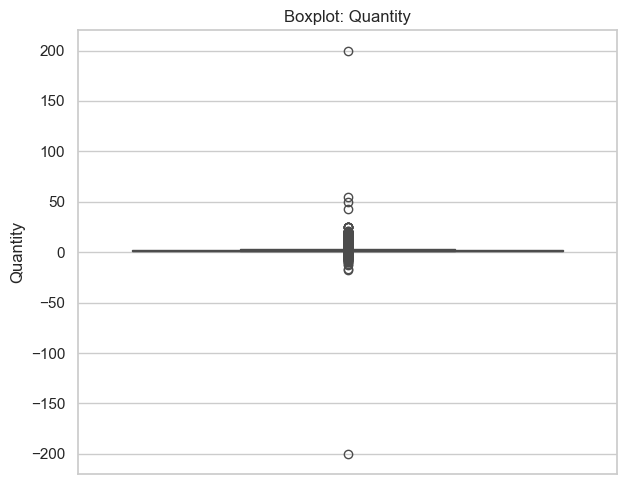

In [71]:
# Set style
sns.set(style="whitegrid")

# Plot boxplots for numerical columns
plt.figure(figsize=(12, 5))

# Boxplot for 'Quantity'
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Quantity'])
plt.title('Boxplot: Quantity')

plt.tight_layout()
plt.show()


In [72]:
# Step 1: Calculate 1st and 99th percentiles
q_low = df['Quantity'].quantile(0.01)
q_high = df['Quantity'].quantile(0.99)

# Step 2: Cap outliers
df['Quantity'] = df['Quantity'].clip(lower=q_low, upper=q_high)


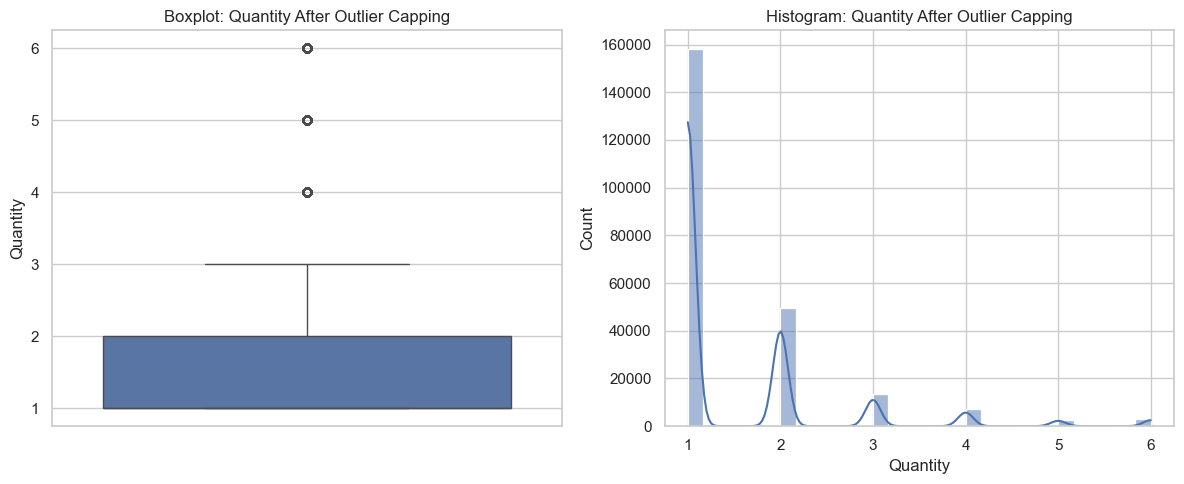

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Quantity'])
plt.title("Boxplot: Quantity After Outlier Capping")

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.title("Histogram: Quantity After Outlier Capping")

plt.tight_layout()
plt.show()


### Encoding

In [74]:
# One-hot encode 'day', 'month', and 'time_period' columns
df_encoded = pd.get_dummies(df, columns=['day', 'month', 'time_period'], prefix=['day', 'month', 'period'])
print(df_encoded.head())

   day_of_the_month               article  Quantity  day_Friday  day_Monday  \
0                 2              BAGUETTE       1.0       False       False   
1                 2      PAIN AU CHOCOLAT       3.0       False       False   
2                 2      PAIN AU CHOCOLAT       2.0       False       False   
3                 2                  PAIN       1.0       False       False   
4                 2  TRADITIONAL BAGUETTE       5.0       False       False   

   day_Saturday  day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  ...  \
0          True       False         False        False          False  ...   
1          True       False         False        False          False  ...   
2          True       False         False        False          False  ...   
3          True       False         False        False          False  ...   
4          True       False         False        False          False  ...   

   month_June  month_March  month_May  month_November  m

In [75]:
# Compute the mean of 'Quantity' for each unique 'article'
article_target_mean = df_encoded.groupby('article')['Quantity'].mean()

# Map these means to the 'article' column
df_encoded['article_encoded'] = df_encoded['article'].map(article_target_mean)

# (Optional) Drop the original 'article' column if no longer needed
df_encoded.drop(columns=['article'], inplace=True)
print(df_encoded.head())

   day_of_the_month  Quantity  day_Friday  day_Monday  day_Saturday  \
0                 2       1.0       False       False          True   
1                 2       3.0       False       False          True   
2                 2       2.0       False       False          True   
3                 2       1.0       False       False          True   
4                 2       5.0       False       False          True   

   day_Sunday  day_Thursday  day_Tuesday  day_Wednesday  month_April  ...  \
0       False         False        False          False        False  ...   
1       False         False        False          False        False  ...   
2       False         False        False          False        False  ...   
3       False         False        False          False        False  ...   
4       False         False        False          False        False  ...   

   month_March  month_May  month_November  month_October  month_September  \
0        False      False        

In [76]:
df_encoded.columns

Index(['day_of_the_month', 'Quantity', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'month_April', 'month_August', 'month_December',
       'month_February', 'month_January', 'month_July', 'month_June',
       'month_March', 'month_May', 'month_November', 'month_October',
       'month_September', 'period_afternoon', 'period_evening',
       'period_morning', 'period_noon', 'article_encoded'],
      dtype='object')

## Train Test split

In [77]:
X = df_encoded.drop(columns=['Quantity'])  # Features without target
y = df_encoded['Quantity']                  # Target variable

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Random Forest regressor model

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 0.8753387189039437
R²: 0.08475930128167741


## Ensemble Model

In [80]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define base regressors
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
lr = LinearRegression()

# Create the ensemble model
ensemble = VotingRegressor(estimators=[
    ('rf', rf),
    ('gb', gb),
    ('lr', lr)
])

# Train the ensemble
ensemble.fit(X_train, y_train)

# Predict on the test set
y_pred = ensemble.predict(X_test)

# Evaluate the ensemble
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Ensemble Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

Ensemble Model Evaluation:
MAE: 0.60
RMSE: 0.90
R^2: 0.16


## XGBoost

In [82]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define base regressors, including XGBoost
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)
xgb = XGBRegressor(random_state=42, verbosity=0)
lr = LinearRegression()

# Create the ensemble model with XGBoost
ensemble = VotingRegressor(estimators=[
    ('rf', rf),
    ('gb', gb),
    ('xgb', xgb),
    ('lr', lr)
])

# Train the ensemble
ensemble.fit(X_train, y_train)

# Predict on the test set
y_pred = ensemble.predict(X_test)

# Evaluate the ensemble
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Ensemble Model Evaluation (with XGBoost):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

Ensemble Model Evaluation (with XGBoost):
MAE: 0.59
RMSE: 0.89
R^2: 0.17


### Hyperparameter tuning and LightGBM

In [85]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Random Forest hyperparameter grid
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Gradient Boosting hyperparameter grid
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# XGBoost hyperparameter grid
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# LightGBM hyperparameter grid
lgbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [-1, 5, 10]
}

# Randomized search for each model
rf_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, n_iter=10, cv=3, n_jobs=-1, random_state=42)
gb_search = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, n_iter=10, cv=3, n_jobs=-1, random_state=42)
xgb_search = RandomizedSearchCV(XGBRegressor(random_state=42, verbosity=0), xgb_param_grid, n_iter=10, cv=3, n_jobs=-1, random_state=42)
lgbm_search = RandomizedSearchCV(LGBMRegressor(random_state=42), lgbm_param_grid, n_iter=10, cv=3, n_jobs=-1, random_state=42)

print("Tuning Random Forest...")
rf_search.fit(X_train, y_train)
print("Best RF params:", rf_search.best_params_)

print("Tuning Gradient Boosting...")
gb_search.fit(X_train, y_train)
print("Best GB params:", gb_search.best_params_)

print("Tuning XGBoost...")
xgb_search.fit(X_train, y_train)
print("Best XGB params:", xgb_search.best_params_)

print("Tuning LightGBM...")
lgbm_search.fit(X_train, y_train)
print("Best LGBM params:", lgbm_search.best_params_)

# Linear Regression (no tuning needed)
lr = LinearRegression()

# Create the ensemble with tuned models
ensemble = VotingRegressor(estimators=[
    ('rf', rf_search.best_estimator_),
    ('gb', gb_search.best_estimator_),
    ('xgb', xgb_search.best_estimator_),
    ('lgbm', lgbm_search.best_estimator_),
    ('lr', lr)
])

# Train the ensemble
ensemble.fit(X_train, y_train)

# Predict and evaluate
y_pred = ensemble.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nEnsemble Model Evaluation (with Hyperparameter Tuning):")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

Tuning Random Forest...
Best RF params: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': 10}
Tuning Gradient Boosting...
Best GB params: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Tuning XGBoost...
Best XGB params: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Tuning LightGBM...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 187204, number of used features: 25
[LightGBM] [Info] Start training from score 1.532029
Best LGBM params: {'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, yo